# Analysing CIA Factbook data using SQLite and Python
In this project I am working with the CIA Factbook data. 'The World Factbook provides information on the history, people and society, government, economy, energy, geography, communications, transportation, military, and transnational issues for 267 world entities.' (from their [webside](https://www.cia.gov/library/publications/the-world-factbook/)). The database can be found at the [factbook](https://github.com/factbook/factbook.sql/releases) GitHub repo.



In [2]:
import sqlite3
import pandas as pd
conn = sqlite3.connect("factbook.db")

query = "SELECT * FROM sqlite_master WHERE type = 'table';"
print("Information about the tables")
pd.read_sql_query(query, conn)

Information about the tables


,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


### Facts table

In [4]:
query = "SELECT * FROM facts LIMIT 5"
pd.read_sql_query(query, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


|Column name | Description|
|---|---|
|name| The name of the country|
|area| The total land and sea area of the country|
|population| The country's population|
|population_growth| The country's population growth as a percentage|
|birth_rate| The country's birth rate, or the number of births a year per 1,000 people|
|death_rate| The country's death rate, or the number of death a year per 1,000 people|
|area| The country's total area (both land and water)|
|area_land| The country's land area in square kilometers|
|area_water| The country's waterarea in square kilometers|


#### Summary statistics

In [5]:
query = "SELECT MIN(population), MAX(population), MIN(population_growth), Max(population_growth) from facts"
pd.read_sql_query(query, conn)

,MIN(population),MAX(population),MIN(population_growth),Max(population_growth)
0,0,7256490011,0.0,4.02


There seems to be a country with 0 population and one country with 7.2 billion people. 

In [9]:
query = "SELECT * from facts where population = 0"
pd.read_sql_query(query, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,250,ay,Antarctica,None,280000,None,0,None,None,None,None


In [10]:
query = "select * from facts where population = (select max(population) from facts)"
pd.read_sql_query(query, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None


It seems that the table contains a row with the whole world which explains the population of over 7.2 billion. The table also contains a row of Antarctica which explains the population of 0. Antarctica has both permanent and summer-only staffed inhabitants at its research stations but has no native inhabitants. 53 countries signed the 1959 [Antarctic Treaty](https://en.wikipedia.org/wiki/Antarctic_Treaty_System) which made Antarctica a continent for scientific investigation and banned military activities.

### Histogram of birthrate, deathrate, population and population_growth

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2885: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f373aa302e8>,
      dtype=object)

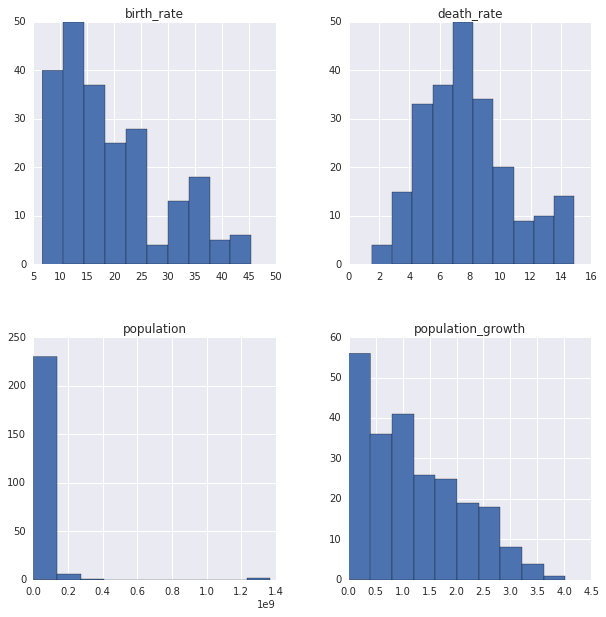

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

query = "select population, population_growth, birth_rate, death_rate from facts where name != 'Antarctica' and name != 'World' and name != 'European Union'"
pd.read_sql_query(query, conn).hist(ax = ax)

**Countries with population less than a million:**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f373a3072b0>]],
      dtype=object)

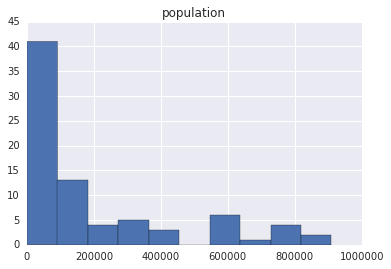

In [50]:
query = "select population from facts where population < 1000000 and name != 'Antarctica' and name != 'World' and name != 'European Union'"
pd.read_sql_query(query, conn).hist()


### Highest population density
Population density is the ration of population to area (pop/km <sup>2</sup>).

In [33]:
print("Highest population density in the world")
query = "select name, cast(population as float) / cast(area as float) as population_density from facts order by population_density DESC limit 20"
pd.read_sql_query(query, conn)

Highest population density in the world


,name,population_density
0,Macau,21168.964286
1,Monaco,15267.500000
2,Singapore,8141.279770
3,Hong Kong,6445.041516
4,Gaza Strip,5191.819444
5,Gibraltar,4876.333333
6,Bahrain,1771.859211
7,Maldives,1319.640940
8,Malta,1310.015823
9,Bermuda,1299.925926


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f373ab13e48>]],
      dtype=object)

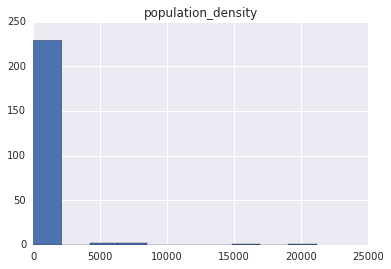

In [31]:
fig = plt.figure(figsize=(10,10))

query = "select cast(population as float) / cast(area as float) as population_density from facts where name != 'Antarctica' and name != 'World' and name != 'European Union'"
pd.read_sql_query(query, conn).hist()

**Distribution of countries with a density lower than 2000 pop/km<sup>2</sup>**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f373aa2b630>]],
      dtype=object)

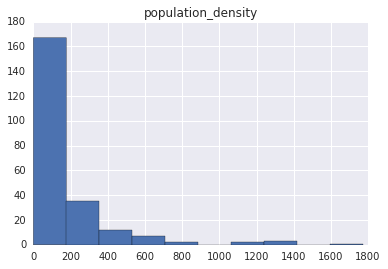

In [34]:
fig = plt.figure(figsize=(10,10))

query = "select cast(population as float) / cast(area as float) as population_density from facts where name != 'Antarctica' and name != 'World' and name != 'European Union' and population_density < 2000"
pd.read_sql_query(query, conn).hist()

**Distribution of countries with a population density less than 300 pop/km<sup>2</sup>**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f373aa96a90>]],
      dtype=object)

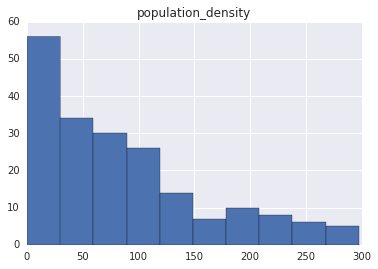

In [32]:
fig = plt.figure(figsize=(10,10))

query = "select cast(population as float) / cast(area as float) as population_density from facts where name != 'Antarctica' and name != 'World' and name != 'European Union' and population_density < 300"
pd.read_sql_query(query, conn).hist()

### Highest ratios of water to land
Countries with the highest ratio of water to land. 

In [30]:
query = "select name country, cast(area_water as float) / cast(area_land as float) as water_land_ratio from facts order by water_land_ratio DESC limit 20"
pd.read_sql_query(query, conn)

,country,water_land_ratio
0,British Indian Ocean Territory,905.666667
1,Virgin Islands,4.520231
2,Puerto Rico,0.554791
3,"Bahamas, The",0.386613
4,Guinea-Bissau,0.284673
5,Malawi,0.259396
6,Netherlands,0.225710
7,Uganda,0.222922
8,Eritrea,0.164356
9,Liberia,0.156240


### Countries with more water than land

In [36]:
query = "select name country, area_water, area_land from facts where area_water > area_land"
pd.read_sql_query(query, conn)

,country,area_water,area_land
0,British Indian Ocean Territory,54340,60
1,Virgin Islands,1564,346
